# Trabalho de ADC 

### Imports

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Tratamento de dados

In [4]:
paths = pd.read_csv('tsvs/paths_finished.tsv', sep='\t')

all_paths = paths.iloc[:, 3].str.split(';')


Caracterização do dataset


In [10]:
G = nx.DiGraph()

for path in all_paths:

    path = [node for node in path if node != '<']
    if len(path) > 1:
        edges = list(zip(path[:-1], path[1:]))  
        G.add_edges_from(edges)
        
largest_scc = max(nx.strongly_connected_components(G), key=len)
scc_graph = G.subgraph(largest_scc).copy()

diameter = nx.diameter(scc_graph)
num_nodes = scc_graph.number_of_nodes()
num_edges = scc_graph.number_of_edges()
is_connected = nx.is_strongly_connected(scc_graph)
avg_path_length = nx.average_shortest_path_length(scc_graph)

degrees = dict(scc_graph.degree())
degree_values = list(degrees.values())

degree_values_filtered = [degree for degree in degree_values if 0 <= degree <= 500]

plt.hist(degree_values_filtered, bins=30, range=(0, 500), alpha=0.7)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Node Degree Distribution (Largest SCC)')
plt.show()

print("Network Characteristics (Largest SCC):")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Diameter: {diameter}")
print(f"Is the Network Well-Connected: {is_connected}")
print(f"Average Path Length: {avg_path_length}")

KeyboardInterrupt: 

## Encontrar os hubs do dataset

Top 10 Nodes with Highest Degrees:
Node: United_States, Degree: 1623
Node: Europe, Degree: 901
Node: United_Kingdom, Degree: 882
Node: England, Degree: 797
Node: World_War_II, Degree: 669
Node: France, Degree: 581
Node: Africa, Degree: 551
Node: Germany, Degree: 513
Node: English_language, Degree: 444
Node: North_America, Degree: 433


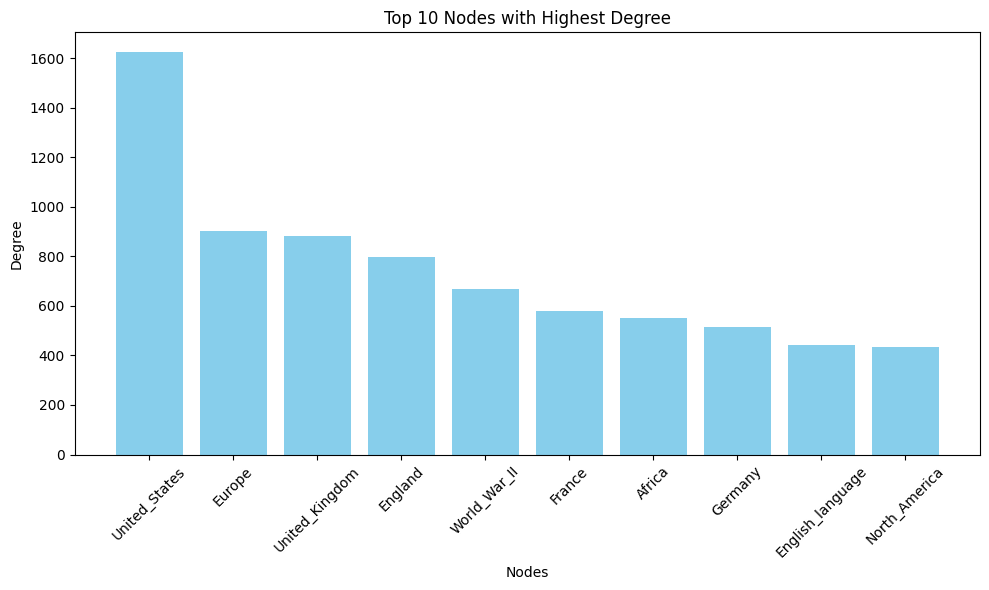

In [ ]:
degrees = dict(G.degree())

top_10_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Nodes with Highest Degrees:")
for node, degree in top_10_degrees:
    print(f"Node: {node}, Degree: {degree}")

top_10_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

nodes = [node[0] for node in top_10_degrees]
node_degrees = [node[1] for node in top_10_degrees]

plt.figure(figsize=(10, 6))
plt.bar(nodes, node_degrees, color='skyblue')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Top 10 Nodes with Highest Degree')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Betweenness centrality

Top Nodes with Highest Betweenness Centrality:
Node: United_States, Betweenness Centrality: 0.14400174586596665
Node: United_Kingdom, Betweenness Centrality: 0.058868846286999586
Node: England, Betweenness Centrality: 0.056149894862736006
Node: Europe, Betweenness Centrality: 0.04950606281599599
Node: Africa, Betweenness Centrality: 0.03238095462031285
Node: World_War_II, Betweenness Centrality: 0.030024663671772166
Node: Earth, Betweenness Centrality: 0.024771081887863967
Node: France, Betweenness Centrality: 0.0233843922290854
Node: Germany, Betweenness Centrality: 0.023235475018025833
Node: India, Betweenness Centrality: 0.019726929379348602


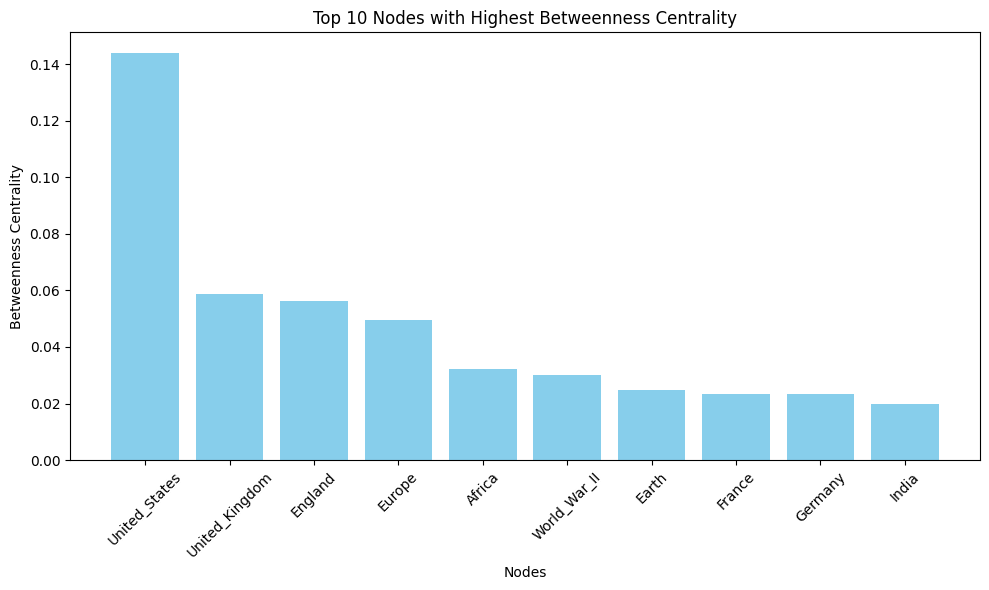

In [ ]:
betweenness = nx.betweenness_centrality(G)

top_nodes_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top Nodes with Highest Betweenness Centrality:")
for node, centrality in top_nodes_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

nodes = [node[0] for node in top_10_betweenness]
node_betweenness = [node[1] for node in top_10_betweenness]

plt.figure(figsize=(10, 6))
plt.bar(nodes, node_betweenness, color='skyblue')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Top 10 Nodes with Highest Betweenness Centrality')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Nós mais acessados do dataset


In [ ]:
all_nodes = []
for path in all_paths:
    all_nodes.extend([node for node in path if node != '<'])

node_counts = pd.Series(all_nodes).value_counts()

top_9_nodes = node_counts.head(9)
print("Top 9 most accessed nodes (excluding '<' backspace node):")
print(top_9_nodes)

Top 9 most accessed nodes (excluding '<' backspace node):
United_States     8896
Europe            4362
United_Kingdom    3904
England           3332
Earth             3223
Africa            2795
World_War_II      2301
North_America     1884
Germany           1769
Name: count, dtype: int64


## Path analysis


Caminhos mais frequentes

In [ ]:

path_counts = {}
for path in all_paths:
    path_tuple = tuple(path)
    
    path_tuple = tuple(node for node in path_tuple if node != '<')
  
    if len(path_tuple) > 1:  
        if path_tuple in path_counts:
            path_counts[path_tuple] += 1
        else:
            path_counts[path_tuple] = 1


top_paths = sorted(path_counts.items(), key=lambda x: x[1], reverse=True)[:5]

for path, count in top_paths:
    print(f"Path: {' -> '.join(path)}, Count: {count}")
    

Path: Brain -> Computer_science -> Information -> Communication -> Telephone, Count: 144
Path: Bird -> Fish -> Whale_shark -> Shark -> Great_white_shark, Count: 86
Path: Asteroid -> Earth -> Europe -> Norway -> Viking, Count: 76
Path: Theatre -> India -> Mammal -> Zebra, Count: 74
Path: Theatre -> Dance -> Animal -> Mammal -> Zebra, Count: 69


Grau de cada nó dos caminhos mais frequentes

In [ ]:
degrees = dict(G.degree())

path_counts = {}
for path in all_paths:
    path_tuple = tuple(path)

    path_tuple = tuple(node for node in path_tuple if node != '<')
    
    if len(path_tuple) > 1: 
        if path_tuple in path_counts:
            path_counts[path_tuple] += 1
        else:
            path_counts[path_tuple] = 1

top_paths = sorted(path_counts.items(), key=lambda x: x[1], reverse=True)[:20]

for path, count in top_paths:
    path_degrees = [f"{node} ({degrees[node]})" for node in path]
    print(f"Path: {' -> '.join(path_degrees)}, Count: {count}")

Path: Brain (91) -> Computer_science (82) -> Information (60) -> Communication (68) -> Telephone (54), Count: 144
Path: Bird (214) -> Fish (137) -> Whale_shark (31) -> Shark (61) -> Great_white_shark (27), Count: 86
Path: Asteroid (61) -> Earth (423) -> Europe (901) -> Norway (134) -> Viking (109), Count: 76
Path: Theatre (45) -> India (422) -> Mammal (224) -> Zebra (36), Count: 74
Path: Theatre (45) -> Dance (37) -> Animal (318) -> Mammal (224) -> Zebra (36), Count: 69
Path: Brain (91) -> Computer_science (82) -> Internet (157) -> Information (60) -> Communication (68) -> Telephone (54), Count: 39
Path: Batman (21) -> Scotland (258) -> Agriculture (255) -> Fossil_fuel (50) -> Wood (54), Count: 38
Path: Brain (91) -> Computer_science (82) -> Internet (157) -> World_Wide_Web (60) -> Telephone (54), Count: 36
Path: Bird (214) -> Fish (137) -> Whale_shark (31) -> Basking_shark (12) -> Great_white_shark (27), Count: 29
Path: Jesus (104) -> God (112), Count: 27
Path: Brain (91) -> Animal (3

In [ ]:
degrees = dict(G.degree())

path_counts = {}
for path in all_paths:
    path_tuple = tuple(path)

    path_tuple = tuple(node for node in path_tuple if node != '<')
    

    if len(path_tuple) > 1: 
        if path_tuple in path_counts:
            path_counts[path_tuple] += 1
        else:
            path_counts[path_tuple] = 1

top_paths = sorted(path_counts.items(), key=lambda x: x[1], reverse=True)[:20]


for path, count in top_paths:
    nodes = [f"{node}" for node in path]
    print(f"{';'.join(nodes)}")

Brain;Computer_science;Information;Communication;Telephone
Bird;Fish;Whale_shark;Shark;Great_white_shark
Asteroid;Earth;Europe;Norway;Viking
Theatre;India;Mammal;Zebra
Theatre;Dance;Animal;Mammal;Zebra
Brain;Computer_science;Internet;Information;Communication;Telephone
Batman;Scotland;Agriculture;Fossil_fuel;Wood
Brain;Computer_science;Internet;World_Wide_Web;Telephone
Bird;Fish;Whale_shark;Basking_shark;Great_white_shark
Jesus;God
Brain;Animal;Human;Communication;Telephone
Pyramid;Ancient_Egypt;Cereal;Seed;Bean
Beer;Water;Sun
Theatre;United_Kingdom;Lion;Zebra
Pyramid;Mexico;Agriculture;Soybean;Seed;Bean
Theatre;France;Kenya;Lion;Zebra
Apple;Fruit;Banana
Theatre;India;Africa;Lion;Zebra
Cat;Dog
Moon;Solar_System;Mars


In [ ]:
backtracking_count = 0

for path in all_paths:
    if '<' in path:
        backtracking_count += 1

total_paths = len(all_paths)
backtracking_frequency = backtracking_count / total_paths if total_paths > 0 else 0

print(f"Frequency of backtracking: {backtracking_frequency:.2%}")

Frequency of backtracking: 17.53%


In [ ]:
double_backtrack_count = 0

for path in all_paths:

    if '<' in path:
        double_backtrack_count += 1

print(f"Number of paths with two backtracks: {double_backtrack_count}")

Number of paths with two backtracks: 8995


In [11]:
for x in range(1, 100):
    paths_with_x_backtracks = sum(path.count('<') == x for path in all_paths)
    print(f"Number of paths with exactly {x} backtracks: {paths_with_x_backtracks}")

Number of paths with exactly 1 backtracks: 5095
Number of paths with exactly 2 backtracks: 1726
Number of paths with exactly 3 backtracks: 815
Number of paths with exactly 4 backtracks: 411
Number of paths with exactly 5 backtracks: 268
Number of paths with exactly 6 backtracks: 173
Number of paths with exactly 7 backtracks: 138
Number of paths with exactly 8 backtracks: 89
Number of paths with exactly 9 backtracks: 71
Number of paths with exactly 10 backtracks: 39
Number of paths with exactly 11 backtracks: 29
Number of paths with exactly 12 backtracks: 24
Number of paths with exactly 13 backtracks: 26
Number of paths with exactly 14 backtracks: 10
Number of paths with exactly 15 backtracks: 13
Number of paths with exactly 16 backtracks: 11
Number of paths with exactly 17 backtracks: 5
Number of paths with exactly 18 backtracks: 5
Number of paths with exactly 19 backtracks: 7
Number of paths with exactly 20 backtracks: 3
Number of paths with exactly 21 backtracks: 3
Number of paths wi

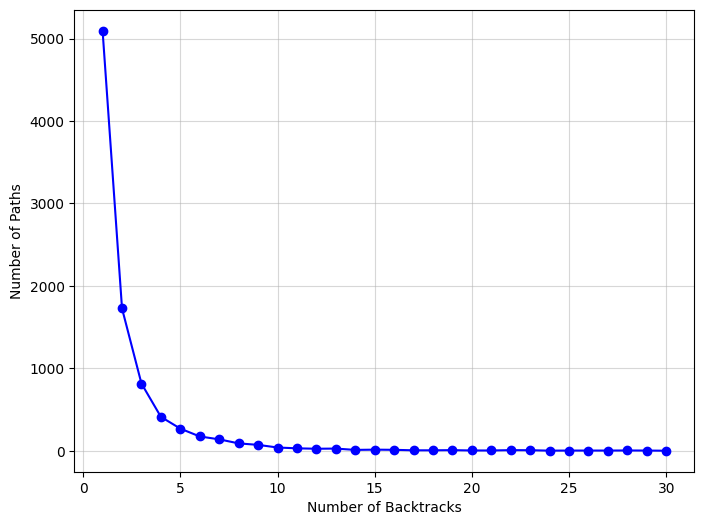

In [ ]:

backtracks_counts = [sum(path.count('<') == x for path in all_paths) for x in range(1, 31)]

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), backtracks_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Backtracks')
plt.ylabel('Number of Paths')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()


## Temporal and difficulty analysis

### Difficulty analysis

In [18]:

difficulty_in_paths = paths.iloc[:, 4]

non_nan_difficulty_count = difficulty_in_paths.notna().sum()

total_paths = len(difficulty_in_paths)

percentage_without_nan_difficulty = (non_nan_difficulty_count / total_paths) * 100
print(f"Percentage of paths who were evaluated for their difficulty: {percentage_without_nan_difficulty:.2f}%")


Percentage of paths who were evaluated for their difficulty: 55.54%


In [35]:
average_difficulty = difficulty_in_paths.mean(skipna=True)
print(f"Average difficulty: {average_difficulty:.2f}")

Average difficulty: 2.27


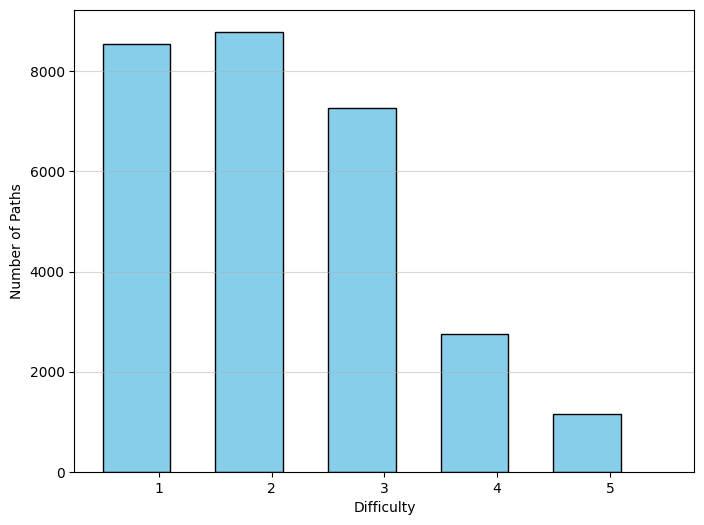

In [25]:
difficulty_numeric = pd.to_numeric(difficulty_in_paths, errors='coerce')

non_nan_difficulty_paths = difficulty_numeric.dropna()

plt.figure(figsize=(8, 6))
plt.hist(non_nan_difficulty_paths, bins=range(1, 7), color='skyblue', edgecolor='black', align='left', width=0.6)
plt.xticks(range(1, 6))
plt.xlabel('Difficulty')
plt.ylabel('Number of Paths')
plt.grid(axis='y', alpha=0.5)
plt.show()

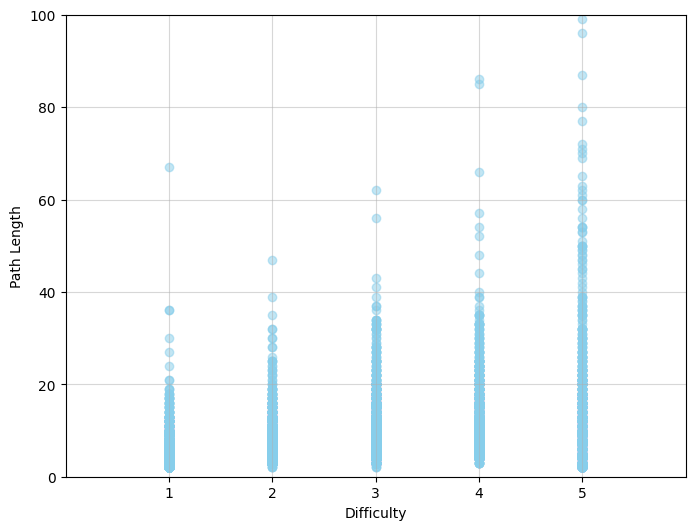

In [31]:
path_sizes = all_paths.apply(len)

plt.figure(figsize=(8, 6))
plt.scatter(non_nan_difficulty_paths, path_sizes.loc[non_nan_difficulty_paths.index], color='skyblue', alpha=0.5)
plt.xlabel('Difficulty')
plt.ylabel('Path Length')
plt.xlim(0, 6)  
plt.xticks(range(1, 6)) 
plt.ylim(0, 100) 
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

## Time analysis

In [45]:
time_in_paths = paths.iloc[:, 2]

time_in_minutes = time_in_paths / 60

average_time = time_in_minutes.mean(skipna=True)
print(f"Average time in paths in minutes: {average_time:.2f}")

Average time in paths in minutes: 2.64


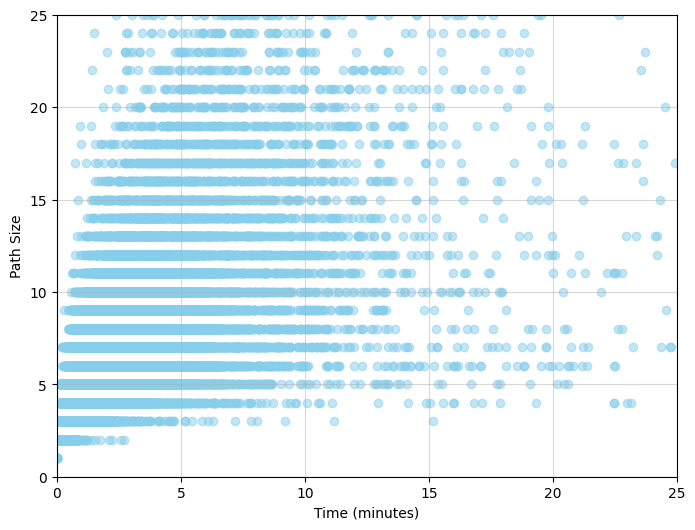

In [53]:

plt.figure(figsize=(8, 6))
plt.scatter(time_in_minutes, path_sizes, color='skyblue', alpha=0.5)
plt.xlabel('Time (minutes)')
plt.ylabel('Path Size')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.xlim(0, 25)
plt.ylim(0, 25)  
plt.show()

In [50]:

count = 0
for time in time_in_paths:
    if(time / 60 > 300):
        print(all_paths[count])
    
    count+=1

['Norse_mythology', 'Literature', 'Fiction', 'Computer_and_video_games', 'Chess', 'Board_game', 'Game', 'Card_game']
['Church_of_England', 'England', 'Charles_Darwin', 'Biology', 'Ecology', 'Soil', 'Soil_science', 'Fertilizer', 'Nitrogen', 'Nitrogen_cycle', 'Nitrogen_fixation']
['Joan_of_Arc', 'Hundred_Years%27_War', 'Weapon', 'Nuclear_weapon', 'Nuclear_fission']
['Theatre', 'United_States', 'Pacific_Ocean', 'Tuna', 'Fish', 'Chordate', 'Mammal', 'Zebra']


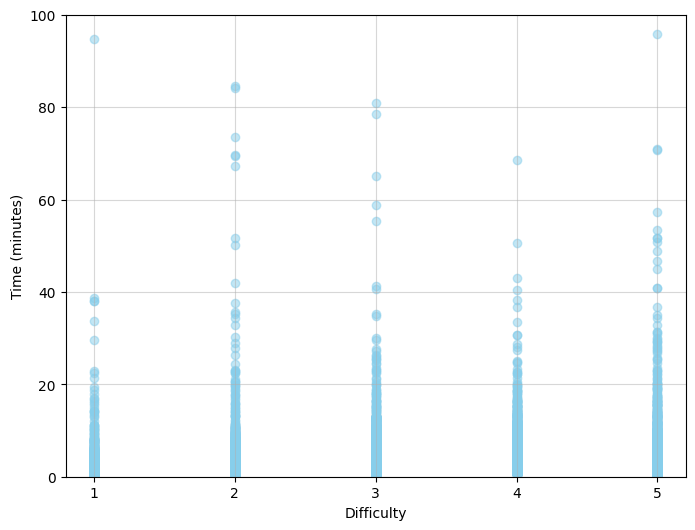

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(difficulty_numeric,time_in_minutes, color='skyblue', alpha=0.5)
plt.xlabel('Difficulty')
plt.ylabel('Time (minutes)')
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.xticks(range(int(difficulty_numeric.min()), int(difficulty_numeric.max()) + 1))

plt.ylim(0, 100)
plt.show()